In [82]:
import pandas as pd

In [83]:
df = pd.read_csv("/app/working/data/la_fire.csv")

/tmp/ipykernel_71/201108581.py:1: DtypeWarning: Columns (13,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/app/working/data/la_fire.csv")


In [84]:
df.head()

,_id,OBJECTID,* Damage,* Street Number,* Street Name,"* Street Type (e.g. road, drive, lane, etc.)","Street Suffix (e.g. apt. 23, blding C)",* City,State,Zip Code,...,Fire Name (Secondary),APN (parcel),Assessed Improved Value (parcel),Year Built (parcel),Site Address (parcel),GLOBALID,Latitude,Longitude,x,y
0,1,1,No Damage,8376.0,Quail Canyon,Road,NaN,Winters,CA,NaN,...,Quail,0101090290,510000.0,1997.0,8376 QUAIL CANYON RD VACAVILLE CA 95688,e1919a06-b4c6-476d-99e5-f0b45b070de8,38.474960,-122.044465,-1.358593e+07,4.646741e+06
1,2,2,Affected (1-9%),8402.0,Quail Canyon,Road,NaN,Winters,CA,NaN,...,Quail,0101090270,573052.0,1980.0,8402 QUAIL CANYON RD VACAVILLE CA 95688,b090eeb6-5b18-421e-9723-af7c9144587c,38.477442,-122.043252,-1.358579e+07,4.647094e+06
2,3,3,No Damage,8430.0,Quail Canyon,Road,NaN,Winters,CA,NaN,...,Quail,0101090310,350151.0,2004.0,8430 QUAIL CANYON RD VACAVILLE CA 95688,268da70b-753f-46aa-8fb1-327099337395,38.479358,-122.044585,-1.358594e+07,4.647366e+06
3,4,4,No Damage,3838.0,Putah Creek,Road,NaN,Winters,CA,NaN,...,Quail,0103010240,134880.0,1981.0,3838 PUTAH CREEK RD WINTERS CA 95694,64d4a278-5ee9-414a-8bf4-247c5b5c60f9,38.487313,-122.015115,-1.358266e+07,4.648497e+06
4,5,5,No Damage,3830.0,Putah Creek,Road,NaN,Winters,CA,NaN,...,Quail,0103010220,346648.0,1980.0,3830 PUTAH CREEK RD WINTERS CA 95694,1b44b214-01fd-4f06-b764-eb42a1ec93d7,38.485636,-122.016122,-1.358277e+07,4.648259e+06


In [85]:
df.shape, df.columns

((100230, 47),
 Index(['_id', 'OBJECTID', '* Damage', '* Street Number', '* Street Name',
        '* Street Type (e.g. road, drive, lane, etc.)',
        'Street Suffix (e.g. apt. 23, blding C)', '* City', 'State', 'Zip Code',
        '* CAL FIRE Unit', 'County', 'Community', 'Battalion',
        '* Incident Name', 'Incident Number (e.g. CAAEU 123456)',
        'Incident Start Date', 'Hazard Type',
        'If Affected 1-9% - Where did fire start?',
        'If Affected 1-9% - What started fire?',
        'Structure Defense Actions Taken', '* Structure Type',
        'Structure Category', '# Units in Structure (if multi unit)',
        '# of Damaged Outbuildings < 120 SQFT',
        '# of Non Damaged Outbuildings < 120 SQFT', '* Roof Construction',
        '* Eaves', '* Vent Screen', '* Exterior Siding', '* Window Pane',
        '* Deck/Porch On Grade', '* Deck/Porch Elevated',
        '* Patio Cover/Carport Attached to Structure',
        '* Fence Attached to Structure', 'Distance - P

# Filter LA County

In [91]:
df_la = df[df['County'].str.lower() == 'los angeles'].copy()
print(f"Filtered to LA County: {df_la.shape}")

Filtered to LA County: (3770, 47)


In [92]:
# Convert incident start date
df_la['Incident Start Date'] = pd.to_datetime(df_la['Incident Start Date'], errors='coerce')

# Drop rows with no valid date
df_la = df_la.dropna(subset=['Incident Start Date'])

# Add year, month
df_la['year'] = df_la['Incident Start Date'].dt.year
df_la['month'] = df_la['Incident Start Date'].dt.month

/tmp/ipykernel_71/2437882568.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_la['Incident Start Date'] = pd.to_datetime(df_la['Incident Start Date'], errors='coerce')


In [93]:
keep_cols = ['* Damage', 'Incident Start Date', 'Zip Code', 'Hazard Type','Latitude', 'Longitude', '* City', '* Structure Type', 'year', 'month'] #or more
df_la_clean = df_la[keep_cols].copy()

In [94]:
df_la_clean['* City'].unique()

array(['LAKE HUGHES', 'LAKE HUGHES ', 'LANCASTER ', 'LANCASTER', nan,
       'Los Angeles County', 'Malibu', 'Agoura Hills', 'Calabasas',
       'Hidden Hills', 'Westlake Village', 'Los Angeles', 'Los Angeles ',
       'Unincorporated', 'Santa Clarita', 'Lebec', 'Lancaster', 'Gorman',
       'Llano', 'Mt Baldy', 'North Hollywood', 'Monrovia', 'Wrightwood',
       'MT. BALDY', 'Mt. Baldy', 'Valyermo', 'Claremont'], dtype=object)

In [95]:
df_la_clean.isna().sum()[df_la_clean.isna().sum() > 0]

Zip Code    2141
* City       569
dtype: int64

# Filter LA City only

In [96]:
df_la_city_clean = df_la_clean[df_la_clean['* City'].str.strip() == 'Los Angeles']

In [97]:
df_la_city_clean

,* Damage,Incident Start Date,Zip Code,Hazard Type,Latitude,Longitude,* City,* Structure Type,year,month
57546,No Damage,2017-12-06,0.0,Fire,34.095153,-118.469189,Los Angeles,Single Family Residence Multi Story,2017,12
57547,No Damage,2017-12-06,0.0,Fire,34.094989,-118.468803,Los Angeles,Single Family Residence Multi Story,2017,12
57548,No Damage,2017-12-06,0.0,Fire,34.094337,-118.468786,Los Angeles,Single Family Residence Multi Story,2017,12
57549,No Damage,2017-12-06,0.0,Fire,34.093915,-118.468773,Los Angeles,Single Family Residence Multi Story,2017,12
57550,No Damage,2017-12-06,0.0,Fire,34.090212,-118.469683,Los Angeles,Single Family Residence Multi Story,2017,12
...,...,...,...,...,...,...,...,...,...,...
74832,Affected (1-9%),2019-10-10,NaN,Fire,34.290280,-118.568069,Los Angeles,Single Family Residence Multi Story,2019,10
74833,Inaccessible,2019-10-10,NaN,Fire,34.292428,-118.537482,Los Angeles,Single Family Residence Multi Story,2019,10
74834,Inaccessible,2019-10-10,NaN,Fire,34.291988,-118.536826,Los Angeles,Single Family Residence Single Story,2019,10
74835,Minor (10-25%),2019-10-10,NaN,Fire,34.283501,-118.530599,Los Angeles,Single Family Residence Multi Story,2019,10


In [98]:
# Reindex the DataFrame to have a new sequential index
df_la_city_clean = df_la_city_clean.reset_index(drop=True)

In [110]:
df_la_county_city_clean = df_la_county_city_clean.rename(columns={
    '* Damage': 'Damage',
    'Zip Code': 'Zip_Code',
    'Hazard Type': 'Hazard_Type',
    'Latitude': 'Latitude',
    'Longitude': 'Longitude',
    '* City': 'City',
    '* Structure Type': 'Structure_Type'
})

In [111]:
df_la_city_clean.to_csv("/app/working/data/la_city_wildfire_cleaned.csv", index=False)

In [121]:
sorted(df_la_city_clean["year"].unique())

[np.int32(2017), np.int32(2019)]

# Filter LA and LA County City

In [112]:
df_la_city_clean.isna().sum()[df_la_city_clean.isna().sum() > 0]

Zip Code    118
dtype: int64

In [113]:
df_la_county_city_clean = df_la_clean[
    df_la_clean['* City'].str.strip().isin(['Los Angeles', 'Los Angeles County'])
]

In [114]:
df_la_county_city_clean

,* Damage,Incident Start Date,Zip Code,Hazard Type,Latitude,Longitude,* City,* Structure Type,year,month
48157,Destroyed (>50%),2018-11-08,NaN,Fire,34.093722,-118.896672,Los Angeles County,Single Family Residence Multi Story,2018,11
48158,Destroyed (>50%),2018-11-08,NaN,Fire,34.089662,-118.899208,Los Angeles County,Mobile Home Double Wide,2018,11
48159,Destroyed (>50%),2018-11-08,NaN,Fire,34.090811,-118.894701,Los Angeles County,Utility Misc Structure,2018,11
48160,Destroyed (>50%),2018-11-08,NaN,Fire,34.089741,-118.894618,Los Angeles County,Single Family Residence Single Story,2018,11
48161,Destroyed (>50%),2018-11-08,NaN,Fire,34.090871,-118.895039,Los Angeles County,Single Family Residence Multi Story,2018,11
...,...,...,...,...,...,...,...,...,...,...
74832,Affected (1-9%),2019-10-10,NaN,Fire,34.290280,-118.568069,Los Angeles,Single Family Residence Multi Story,2019,10
74833,Inaccessible,2019-10-10,NaN,Fire,34.292428,-118.537482,Los Angeles,Single Family Residence Multi Story,2019,10
74834,Inaccessible,2019-10-10,NaN,Fire,34.291988,-118.536826,Los Angeles,Single Family Residence Single Story,2019,10
74835,Minor (10-25%),2019-10-10,NaN,Fire,34.283501,-118.530599,Los Angeles,Single Family Residence Multi Story,2019,10


In [115]:
df_la_county_city_clean.isna().sum()[df_la_county_city_clean.isna().sum() > 0]

Zip Code    975
dtype: int64

In [116]:
sorted(df_la_county_city_clean["year"].unique())

[np.int32(2017), np.int32(2018), np.int32(2019)]

In [117]:
df_la_county_city_clean = df_la_county_city_clean.rename(columns={
    '* Damage': 'Damage',
    'Hazard Type': 'Hazard_Type',
    'Latitude': 'Latitude',
    'Longitude': 'Longitude',
    '* City': 'City',
    '* Structure Type': 'Structure_Type'
})

# EDA

In [118]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Use only Latitude and Longitude
coords = df_la_county_city_clean[['Latitude', 'Longitude']].values

In [119]:
damage_order = [
    'Destroyed (>50%)',
    'Major (26-50%)',
    'Minor (10-25%)',
    'Affected (1-9%)',
    'Inaccessible',
    'No Damage'
]

df_la_county_city_clean['Damage'] = pd.Categorical(df_la_county_city_clean['Damage'], categories=damage_order, ordered=True)
# Custom reversed color palette (dark red = most damage)
custom_palette = sns.color_palette("YlOrRd", n_colors=len(damage_order))[::-1]
damage_palette = dict(zip(damage_order, custom_palette))


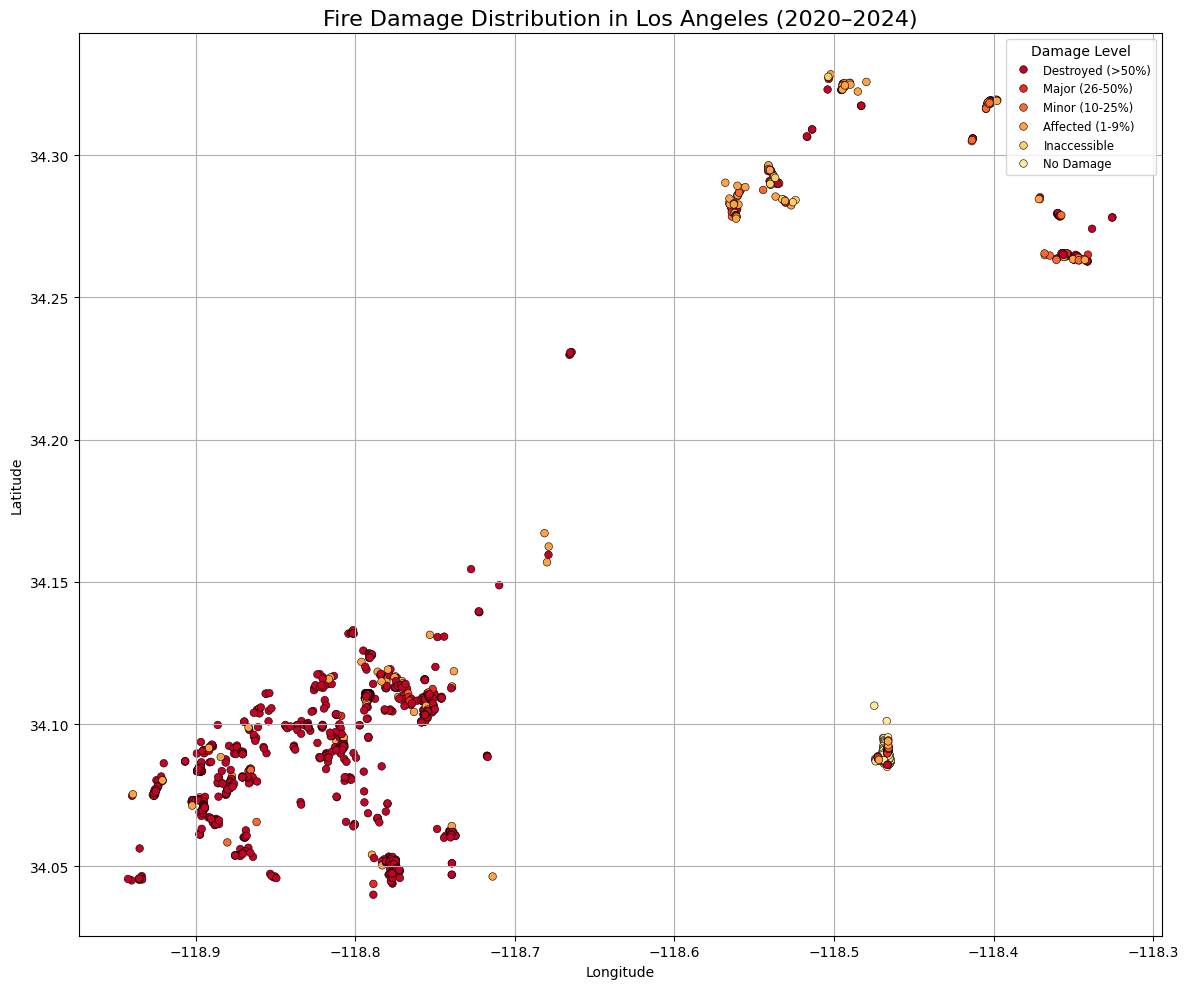

In [120]:
plt.figure(figsize=(12, 10), dpi=100)

sns.scatterplot(
    data=df_la_county_city_clean,
    x='Longitude',
    y='Latitude',
    hue='Damage',
    palette=damage_palette,
    s=30,
    edgecolor='black',
    linewidth=0.4
)

plt.title('Fire Damage Distribution in Los Angeles (2020–2024)', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Damage Level', loc='upper right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()
